# ML Algorithms Crash Course

## **Logistic Regression**
- **Logistic Regression**: It is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?).
- **Softmax Regression**: It is a generalization of logistic regression to support multiple classes directly, without having to train and combine multiple binary classifiers.



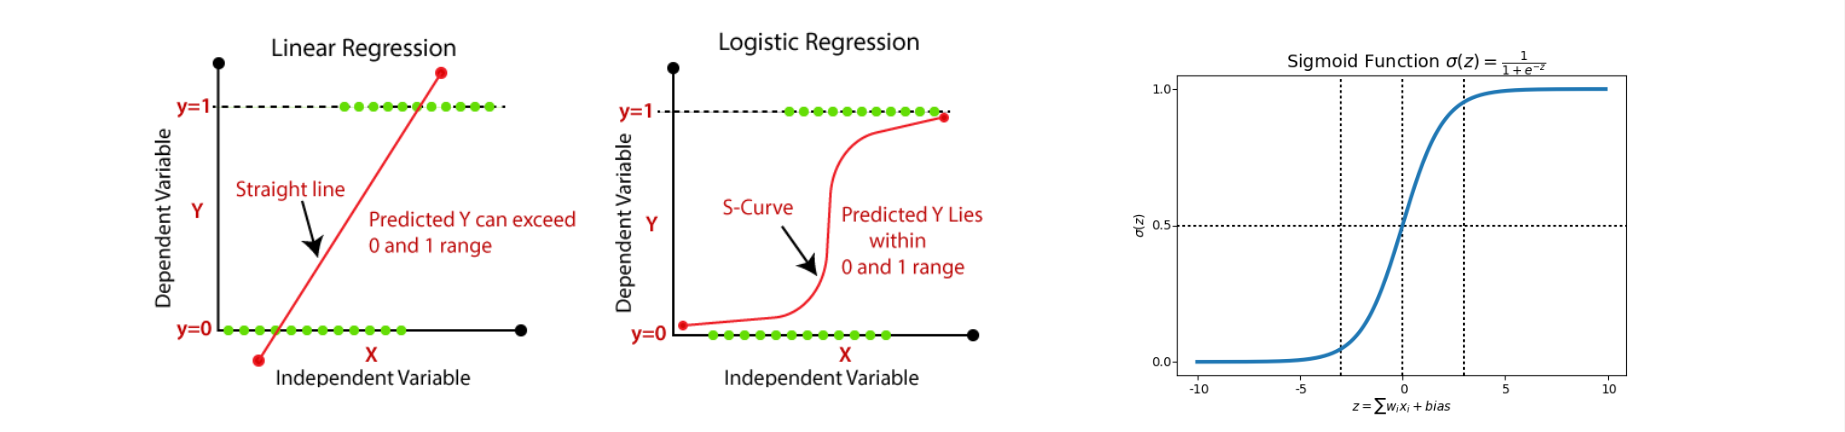

#### Logistic Regression Cost Function
- **Log Loss (Binary Cross Entropy)**: The cost function used in logistic regression. It penalizes the model when it estimates a low probability for a positive instance or a high probability for a negative instance.
    - Formula: $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})]$
    - where $\theta$ is the model's parameter vector, $m$ is the number of instances in the dataset, $y^{(i)}$ is the target probability that the $i^{th}$ instance is positive, and $\hat{p}^{(i)}$ is the model's estimated probability that the $i^{th}$ instance is positive.

- **Log Loss for Multiclass Classification (Cross Entropy)**: The cost function used in softmax regression. It penalizes the model when it estimates a low probability for the target class.
    - Formula: $J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})$
    - where $K$ is the number of classes, $y_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class $k$, and $\hat{p}_k^{(i)}$ is the model's estimated probability that the $i^{th}$ instance belongs to class $k$.

#### Linear Regression vs. Logistic Regression

| **Aspect**                  | **Linear Regression**                                                                                  | **Logistic Regression**                                                                                              |
|-----------------------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **Type of Problem**          | Regression                                                                                            | Classification                                                                                                        |
| **Output**                   | Continuous values                                                                                    | Probabilities (between 0 and 1) or binary outcomes (0 or 1)                                                           |
| **Cost Function**            | Mean Squared Error (MSE)                                                                              | Log Loss (Binary Cross Entropy) or Cross Entropy (for multiclass classification)                                       |
| **Hypothesis Function**      | $h_{\theta}(x) = \theta^T \cdot x$                                                                    | $h_{\theta}(x) = \sigma(\theta^T \cdot x)$                                                                             |
| **Activation Function**      | None                                                                                                | Sigmoid function ($\sigma(z) = \frac{1}{1 + e^{-z}}$)                                                                  |
| **Loss Function**            | $J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})^2$                        | $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})]$       |
| **Decision Boundary**        | No decision boundary (output is a continuous value)                                                  | Decision boundary (output is a probability or binary outcome)                                                         |
| **Model Evaluation**         | RMSE, MAE, etc.                                                                                      | Accuracy, Precision, Recall, F1 Score, etc.                                                                            |
| **Example**                  | Predicting house prices, stock prices, etc.                                                          | Predicting whether an email is spam or not, whether a customer will buy a product or not, etc.                        |
| **Example Dataset**          | Housing prices dataset, stock prices dataset, etc.                                                   | Email spam dataset, customer purchase dataset, etc.                                                                    |
| **Example Libraries**        | Scikit-Learn, TensorFlow, PyTorch, etc.                                                              | Scikit-Learn, TensorFlow, PyTorch, etc.                                                                                |
| **Example Code**             | `from sklearn.linear_model import LinearRegression`<br>`model = LinearRegression()`<br>`model.fit(X, y)` | `from sklearn.linear_model import LogisticRegression`<br>`model = LogisticRegression()`<br>`model.fit(X, y)`          |
| **Example Prediction**       | `model.predict(X_new)`                                                                               | `model.predict(X_new)`                                                                                                |


#### Logistic Regression Code

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


data = load_breast_cancer()
X,y = data.data, data.target

In [18]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [21]:
X.shape, y.shape

((569, 30), (569,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [24]:
model = LogisticRegression(max_iter=10_000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_prob = model.predict_proba(X_test)[:, 1]
# y_prob
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [27]:
import pandas as pd
pd.DataFrame([y_pred, y_prob]).T.head()

,0,1
0,0.0,0.005511
1,1.0,0.966321
2,1.0,0.998062
3,1.0,0.843665
4,1.0,0.999952


In [28]:
accuracy_score(y_test, y_pred)

0.9590643274853801

#### Classification Metrics
- **Accuracy**: The ratio of correctly predicted instances to the total instances.
    - Formula: $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
    - Formula: $Precision = \frac{TP}{TP + FP}$
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the all observations in actual class.
    - Formula: $Recall = \frac{TP}{TP + FN}$
- **F1 Score**: The weighted average of Precision and Recall.
    - Formula: $F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

    

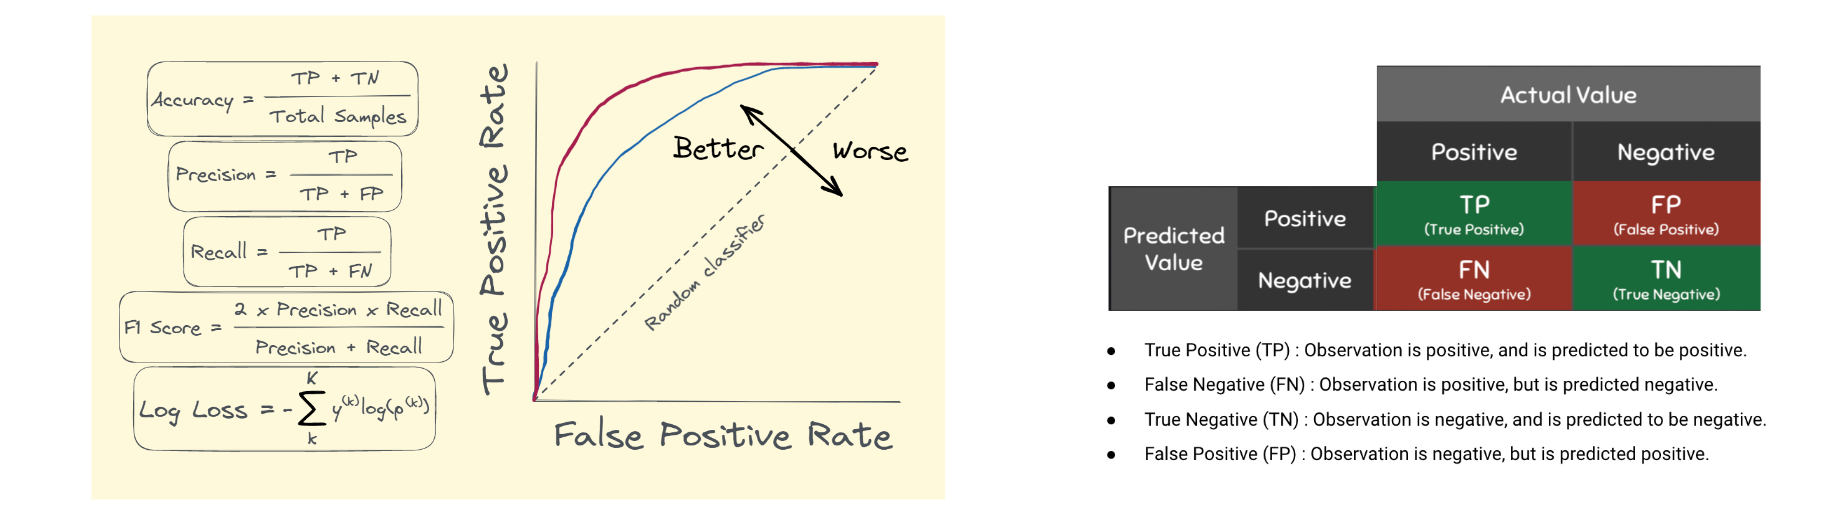

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

Confusion Matrix:
 [[ 62   1]
 [  6 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.99      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC-AUC Score:  0.9963256907701351


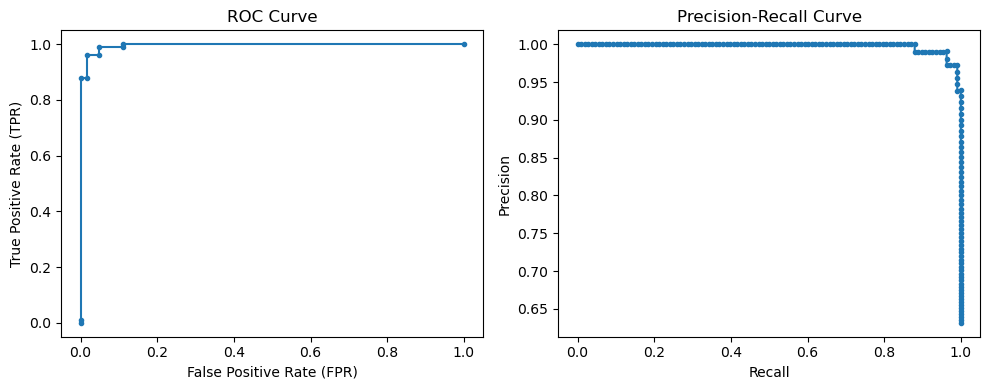

In [37]:
def evaluate_classification(y_true, y_pred, y_prob):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    roc_auc = roc_auc_score(y_true, y_prob)
    print("ROC-AUC Score: ", roc_auc)

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    precision, recall, _ = precision_recall_curve(y_true, y_prob)

    plt.figure(figsize=(10,4), dpi=100)

    ## ROC Curve
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, marker='.')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')


    plt.subplot(1,2,2)
    plt.plot(recall, precision, marker=".")
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.tight_layout()
    plt.show()


evaluate_classification(y_test, y_pred, y_prob)

## **Regularization**
- **Regularization**: A technique used to prevent overfitting by adding a penalty term to the cost function.
- **L2 Regularization (Ridge Regression)**: The regularization term is equal to the L2 norm of the weight vector.
    - Formula: $J(\theta) = MSE(X, h_{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$
- **L1 Regularization (Lasso Regression)**: The regularization term is equal to the L1 norm of the weight vector.
    - Formula: $J(\theta) = MSE(X, h_{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i|$

#### Classification Regularization
- **L2 Regularization (Logistic Regression)**: The regularization term is equal to the L2 norm of the weight vector.
    - Formula: $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})] + \frac{\alpha}{2} \sum_{i=1}^{n} \theta_i^2$
    - where $\alpha$ is the regularization strength and $n$ is the number of features.
- **L1 Regularization (Logistic Regression)**: The regularization term is equal to the L1 norm of the weight vector.
    - Formula: $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)})] + \alpha \sum_{i=1}^{n} |\theta_i|$

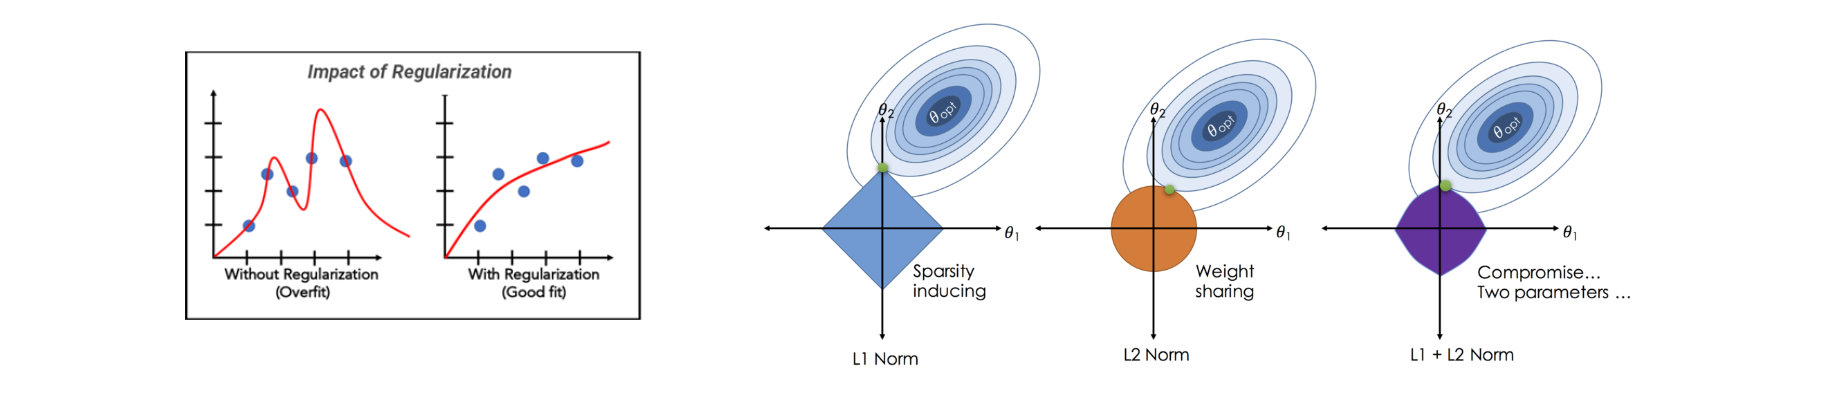

c:\Users\laxmi\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[ 59   4]
 [  7 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171

ROC-AUC Score:  0.9888300999412111


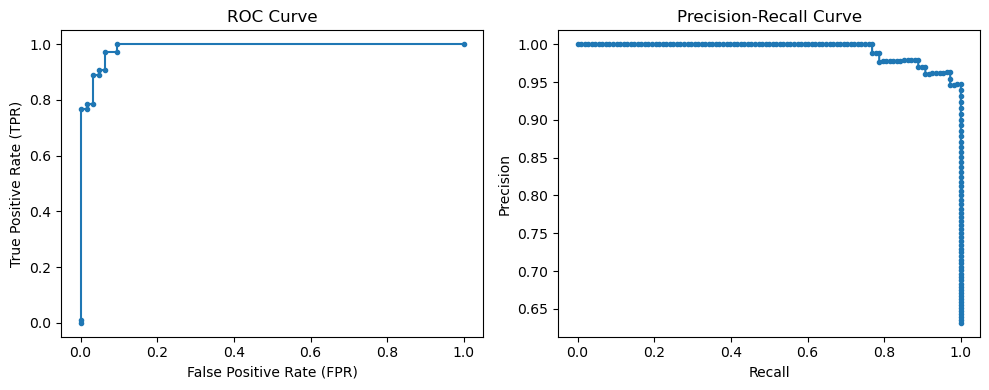

In [41]:
model = LogisticRegression(max_iter=10_000, penalty=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

Confusion Matrix:
 [[ 62   1]
 [  6 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.99      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC-AUC Score:  0.9963256907701351


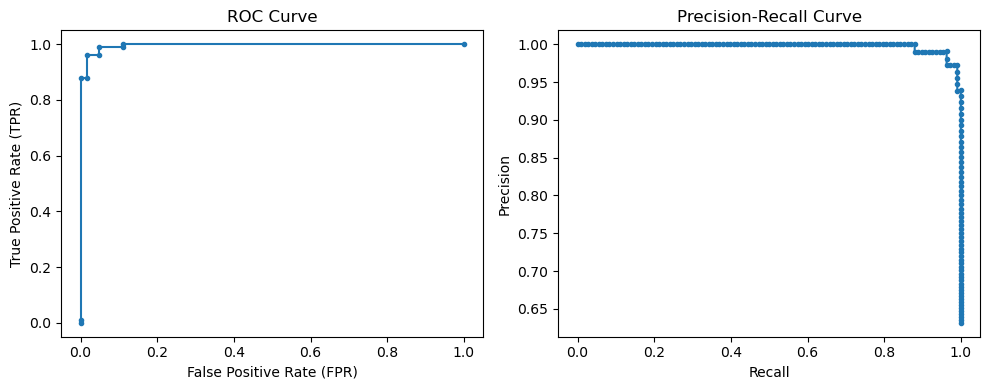

In [42]:
model = LogisticRegression(max_iter=10_000, penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

Confusion Matrix:
 [[ 62   1]
 [  6 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.99      0.94      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

ROC-AUC Score:  0.9963256907701351


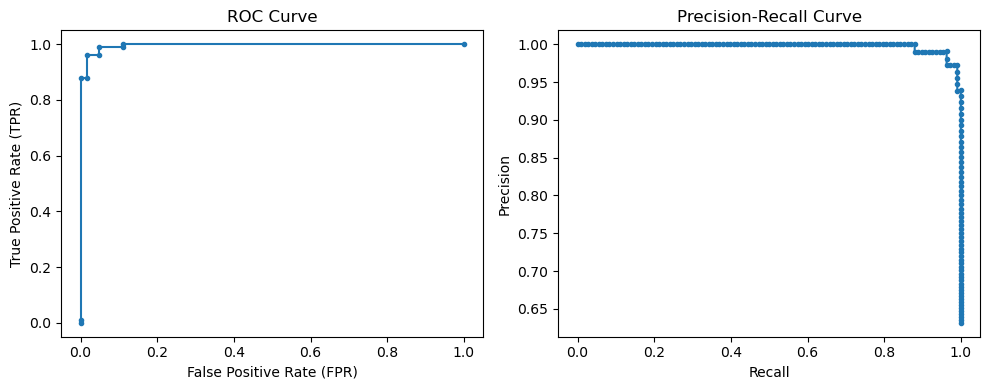

In [54]:
model = LogisticRegression(max_iter=10_000, penalty='l2', C=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

Confusion Matrix:
 [[ 62   1]
 [  5 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       0.99      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

ROC-AUC Score:  0.9961787184009407


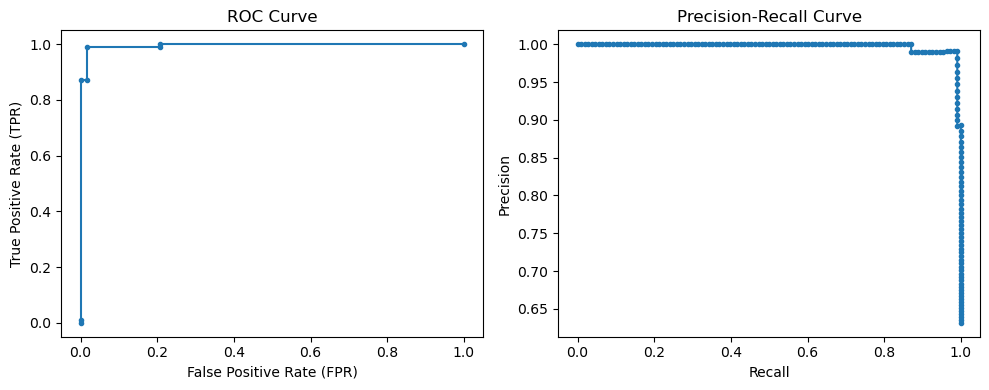

In [44]:
model = LogisticRegression(max_iter=10_000, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

Confusion Matrix:
 [[ 57   6]
 [  3 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

ROC-AUC Score:  0.962962962962963


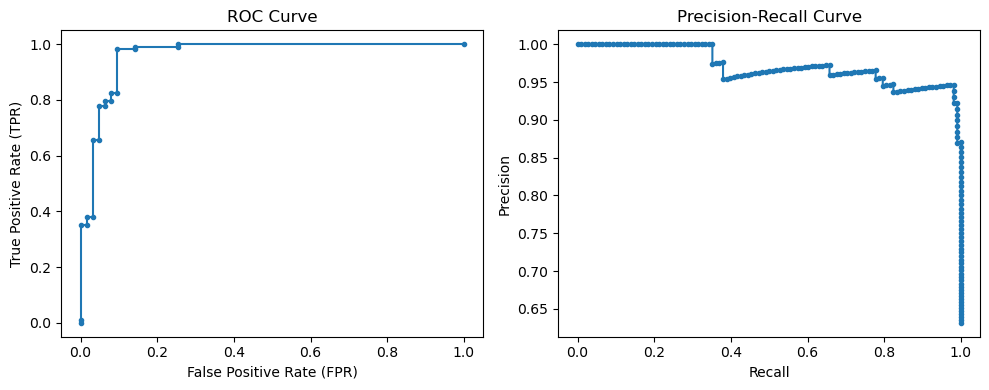

In [51]:
model = LogisticRegression(max_iter=10_000, penalty='elasticnet', solver='saga', l1_ratio=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

Confusion Matrix:
 [[ 57   6]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

ROC-AUC Score:  0.9867724867724867


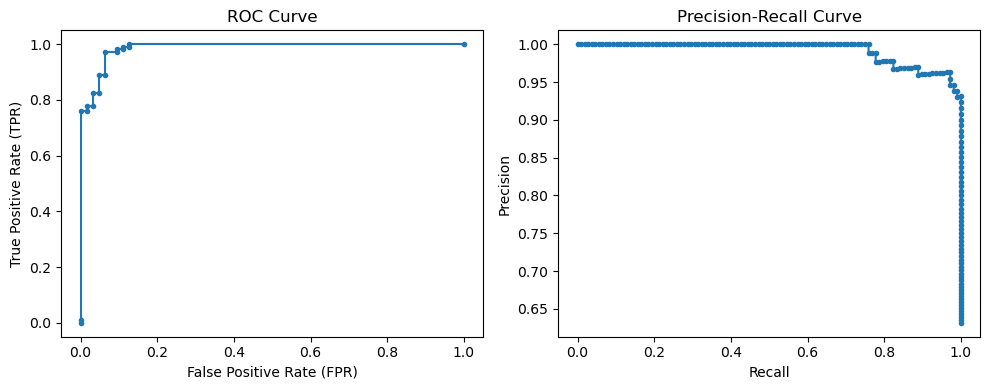

In [62]:
## regularize
model = SVC(probability=True, kernel='rbf', C=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

Confusion Matrix:
 [[ 59   4]
 [  4 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

ROC-AUC Score:  0.9750881834215168


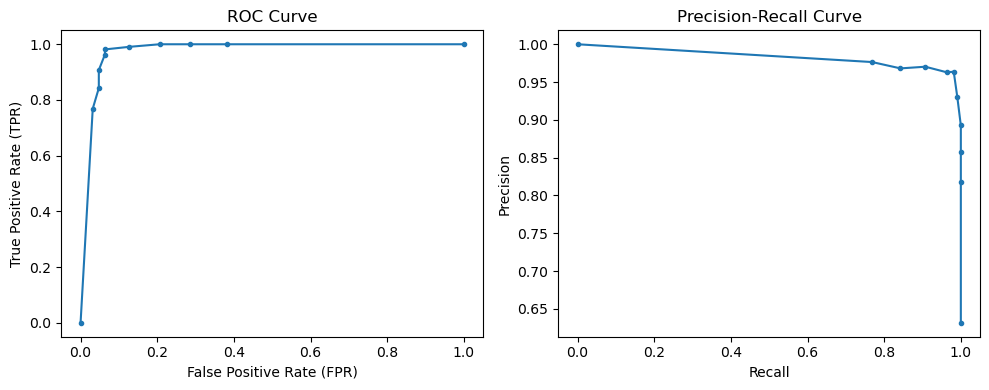

In [73]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)

## **Decision Trees**
- Decision Tree is a flowchart-like structure in which each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.
- The topmost node in a decision tree is the root node.
- Decision nodes (internal nodes) are the nodes which have two or more branches.
- Leaf nodes (terminal nodes) are the nodes which do not have any branches.

- Select the best attribute using Attribute Selection Measures(ASM) to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.


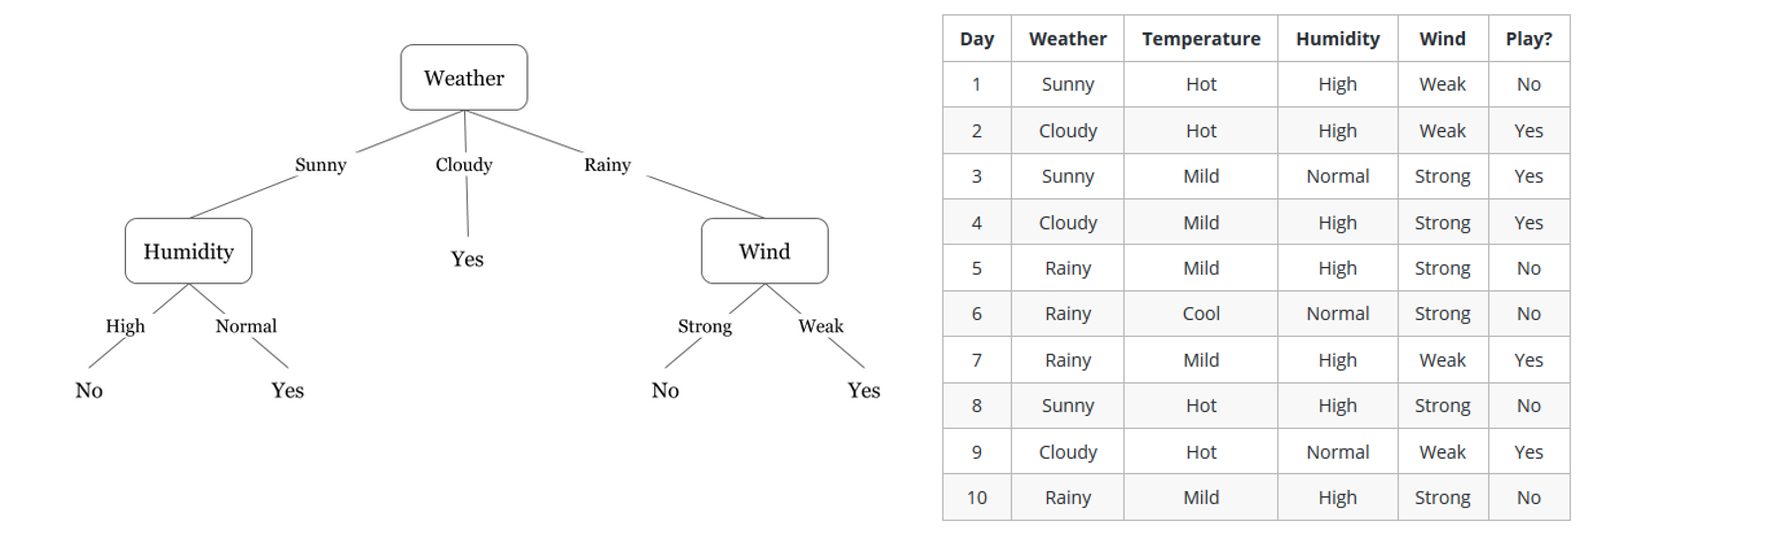

#### Decision Tree Cost Function

1. **Gini Impurity**
   - **How It Helps:** Gini impurity measures how mixed up your decisions are when you split based on a weather factor like temperature or humidity. It helps you pick the split that makes your decision groups (like playing outside or not) as clear and consistent as possible.
   - **Formula:** $Gini = 1 - \sum_{i=1}^{n} p_i^2$  
     where $p_i$ is the proportion of days with specific weather conditions where you either do or don't play outside.

2. **Entropy (Information Gain)**
   - **How It Helps:** Entropy measures the uncertainty in your decision based on a weather factor. Information gain helps you choose the split that makes your decision (to play or not) more predictable and less chaotic.
   - **Formula:** $Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i)$  
     where $p_i$ is the probability of making a certain decision (like playing outside) based on specific weather conditions.

In [81]:
1 - ((1/3)**2 + (2/3)**2)
1 - ((3/3)**2 + 0)
1 - ((1/4)**2 + (3/4)**2)

0.375

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
# help(DecisionTreeClassifier)

Confusion Matrix:
 [[60  3]
 [10 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        63
           1       0.97      0.91      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

ROC-AUC Score:  0.9298941798941799


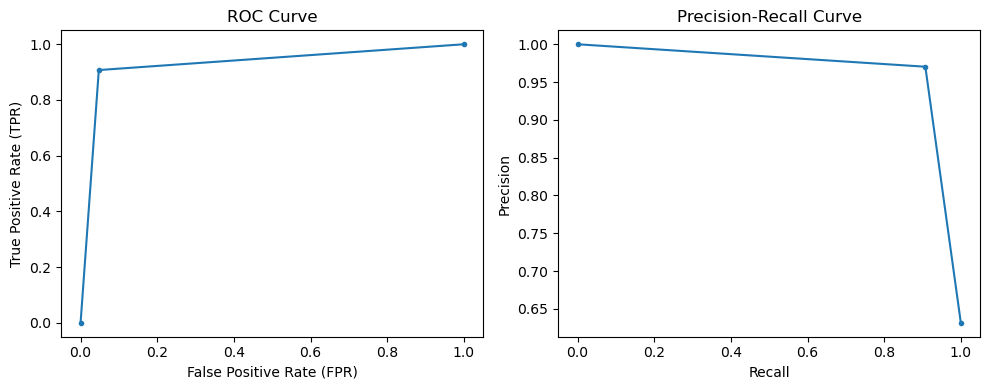

In [86]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

evaluate_classification(y_test, y_pred, y_prob)


Confusion Matrix:
 [[149   0]
 [  0 249]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

ROC-AUC Score:  1.0


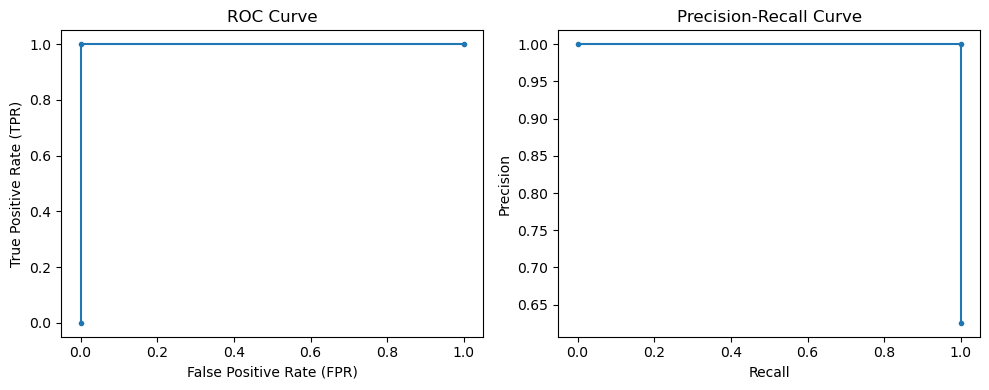

In [87]:
y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
evaluate_classification(y_train, y_pred_train, y_prob_train)

In [129]:
# Test Accuracy, 0.92
# Train Accuracy, 1.0
model = DecisionTreeClassifier(max_depth=4, max_features=None, min_impurity_decrease=0.01, max_leaf_nodes=3,random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Test Accuracy")
print(accuracy_score(y_test, y_pred))

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
print("\nTrain Accuracy")
print(accuracy_score(y_train, y_pred_train))

Test Accuracy
0.9473684210526315

Train Accuracy
0.9522613065326633


In [133]:
# data

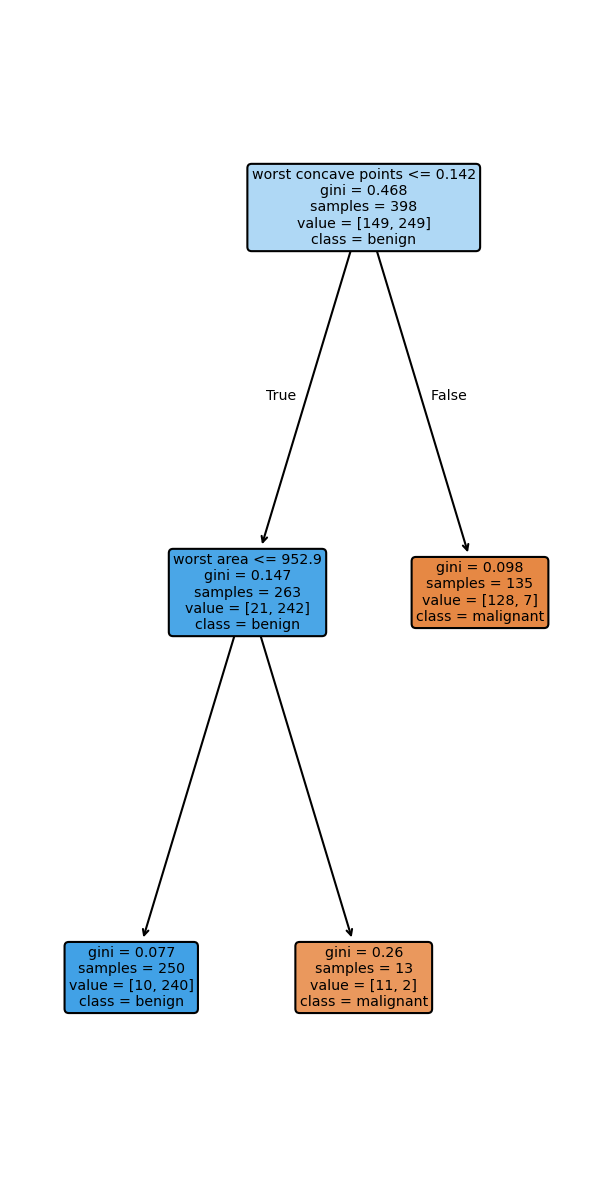

In [139]:
## plotting decision tree
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=4, max_features=None, min_impurity_decrease=0.01, max_leaf_nodes=3,random_state=0)
model.fit(X_train, y_train)

plt.figure(figsize=(5,10), dpi=150)
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()


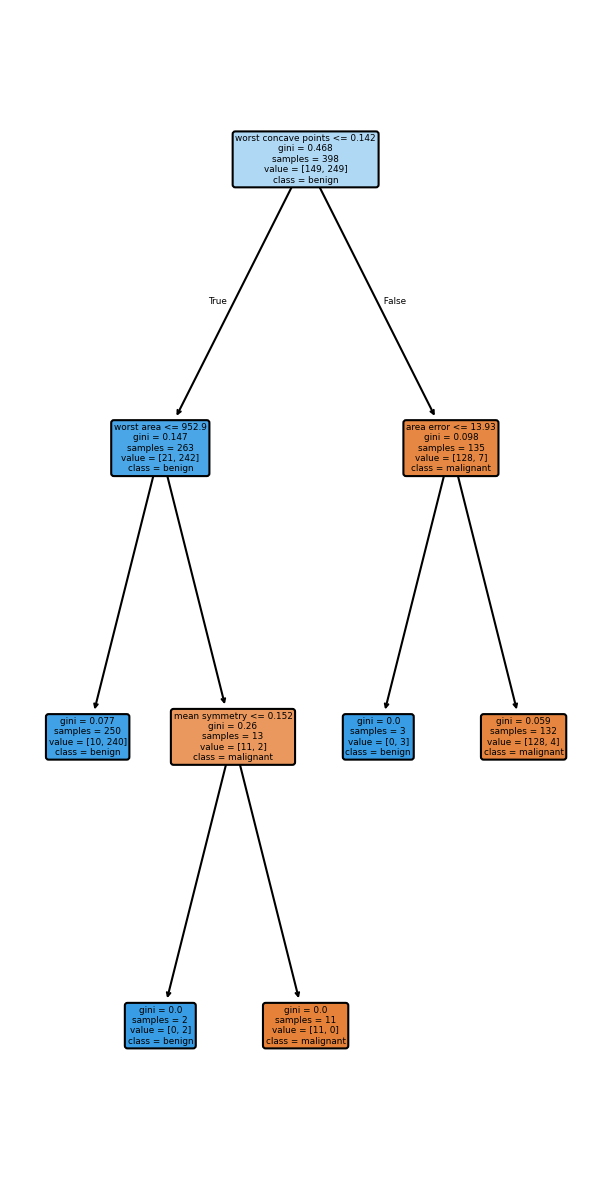

In [146]:
## plotting decision tree
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=10, max_features=None, min_impurity_decrease=0, max_leaf_nodes=5,random_state=0)
model.fit(X_train, y_train)

plt.figure(figsize=(5,10), dpi=150)
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

In [140]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## **Random Forest**
- **Random Forest**: An ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction.
- **Bagging (Bootstrap Aggregating)**: A technique used to reduce the variance of a model by training multiple models on different random subsets of the data and combining their predictions.
- **Random Forest Algorithm**:
    1. Randomly select $k$ features from total $m$ features.
    2. Among the $k$ features, calculate the node $d$ using the best split point.
    3. Split the node into child nodes using the best split.
    4. Repeat steps 1 to 3 until the tree is fully grown.
    5. Build multiple trees to form a forest.
    6. Predict the final output by taking the majority vote.

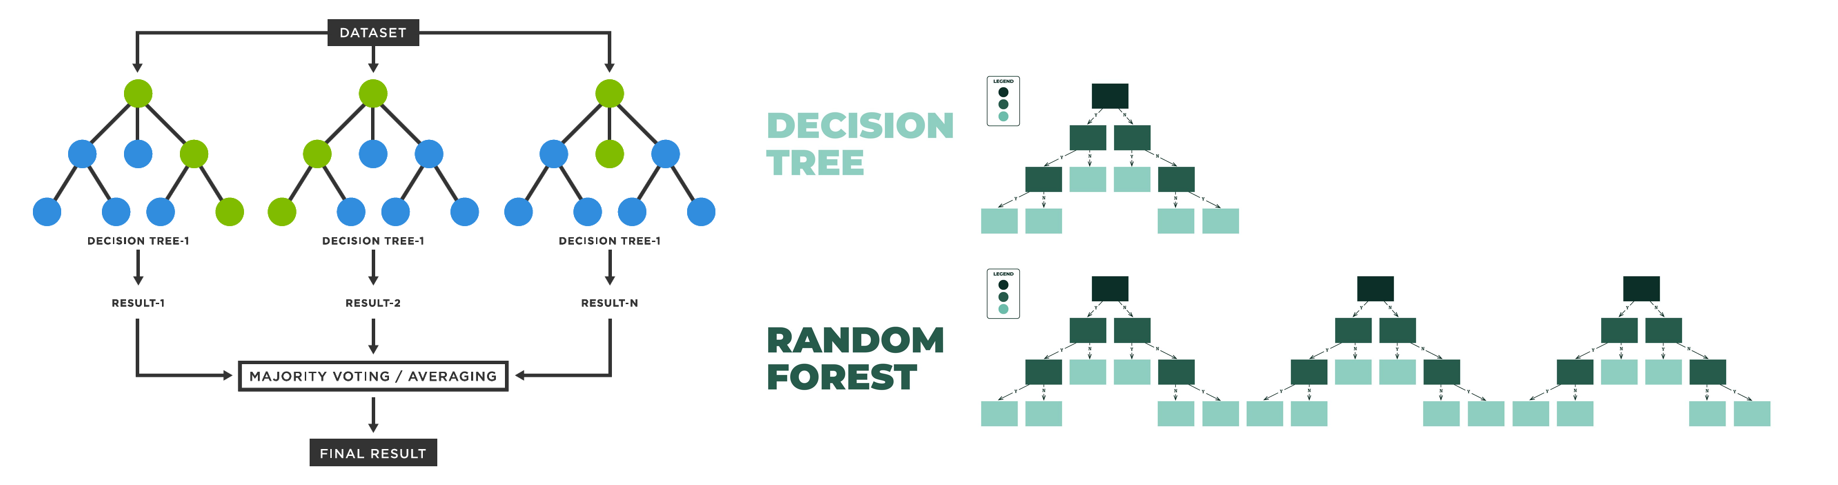

#### Random Forest Cost Function
- Same as Decision Tree Cost Function (Gini Impurity, Entropy)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
# help(RandomForestClassifier)

In [157]:
# model = RandomForestClassifier(max_depth=4, max_features=None, min_impurity_decrease=0.01, max_leaf_nodes=3,random_state=0)

model = RandomForestClassifier(random_state=0, n_estimators=1000, n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Test Accuracy")
print(accuracy_score(y_test, y_pred))

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
print("\nTrain Accuracy")
print(accuracy_score(y_train, y_pred_train))

Test Accuracy
0.9649122807017544

Train Accuracy
1.0


In [171]:

model = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1, max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Test Accuracy")
print(accuracy_score(y_test, y_pred))

y_pred_train = model.predict(X_train)
y_prob_train = model.predict_proba(X_train)[:,1]
print("\nTrain Accuracy")
print(accuracy_score(y_train, y_pred_train))

Test Accuracy
0.9649122807017544

Train Accuracy
0.992462311557789


## **Cross Validation**
- **Cross Validation**: A technique used to evaluate the performance of a machine learning model by training and testing it on multiple subsets of the data.
- **K-Fold Cross Validation**: The training set is split into $k$ smaller sets. The model is trained on $k-1$ of the folds and tested on the remaining fold. This process is repeated $k$ times, with each of the $k$ folds used exactly once as the validation data.
- **Leave-One-Out Cross Validation (LOOCV)**: A special case of $k$-fold cross-validation where $k$ is equal to the number of instances in the dataset.



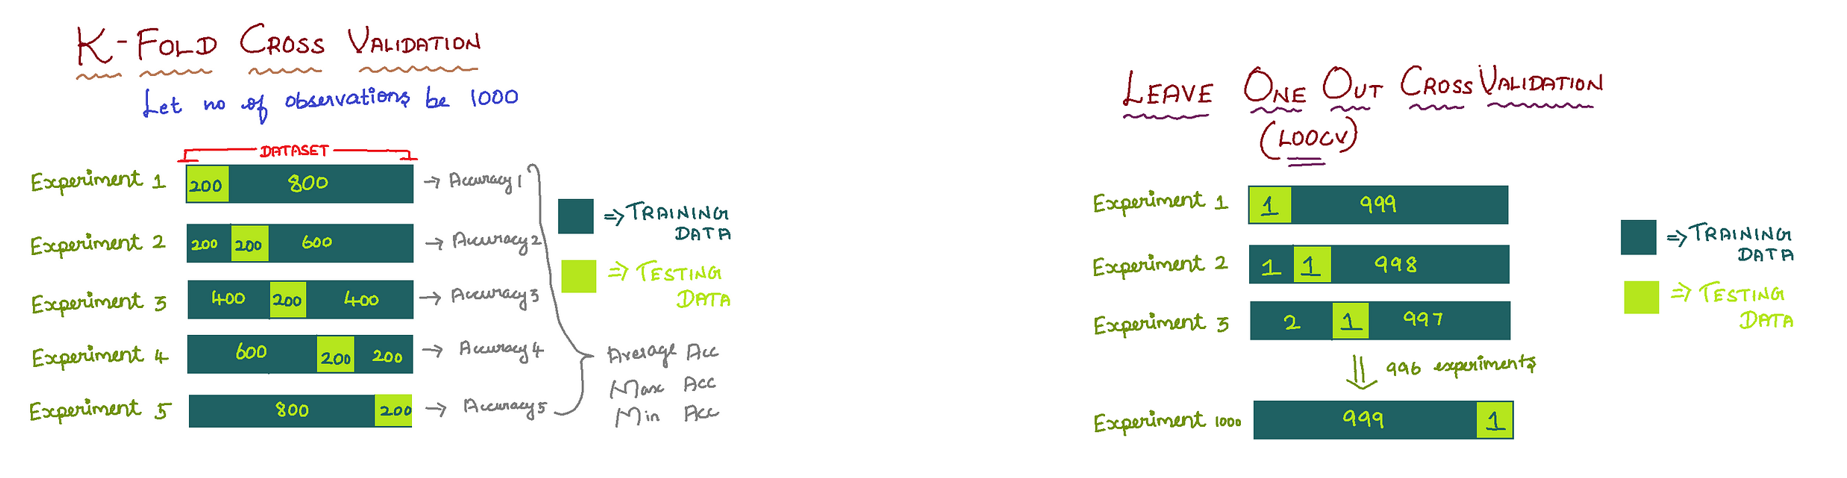

In [175]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
scores

array([0.92105263, 0.93859649, 0.98245614, 0.98245614, 0.97345133])

In [178]:
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['model', 'mean accuracy', 'std dev', 'scores']

models = {'Logistic Regression': LogisticRegression(max_iter=10_000),
          'SVM': SVC(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    table.add_row([name, round(scores.mean(),3), round(scores.std(),3), scores])

print(table)


+---------------------+---------------+---------+----------------------------------------------------------+
|        model        | mean accuracy | std dev |                          scores                          |
+---------------------+---------------+---------+----------------------------------------------------------+
| Logistic Regression |     0.951     |  0.018  | [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221] |
|         SVM         |     0.912     |  0.035  | [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ] |
|         KNN         |     0.928     |  0.022  | [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354] |
|    Decision Tree    |     0.917     |  0.011  | [0.9122807  0.90350877 0.92982456 0.92982456 0.91150442] |
|    Random Forest    |     0.963     |  0.017  | [0.93859649 0.94736842 0.98245614 0.97368421 0.97345133] |
+---------------------+---------------+---------+----------------------------------------------------------+


In [173]:
100/10

10.0

In [179]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['model', 'mean accuracy', 'std dev', 'scores']

loo = LeaveOneOut()

models = {'Logistic Regression': LogisticRegression(max_iter=10_000),
          'SVM': SVC(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

    table.add_row([name, round(scores.mean(),3), round(scores.std(),3), scores])

print(table)


+---------------------+---------------+---------+--------------------------------------------------------------------------+
|        model        | mean accuracy | std dev |                                  scores                                  |
+---------------------+---------------+---------+--------------------------------------------------------------------------+
| Logistic Regression |     0.954     |  0.209  | [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. |
|                     |               |         |  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. |
|                     |               |         |  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. |
|                     |               |         |  1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. |
|                     |               |         |  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. |


## **Hyperparameter Tuning**
- **Hyperparameter Tuning**: The process of finding the best hyperparameters for a machine learning model.
- **Grid Search**: A technique used to search for the best hyperparameters by evaluating the model performance for each combination of hyperparameters in a grid.
- **Random Search**: A technique used to search for the best hyperparameters by evaluating the model performance for a fixed number of random hyperparameter combinations.


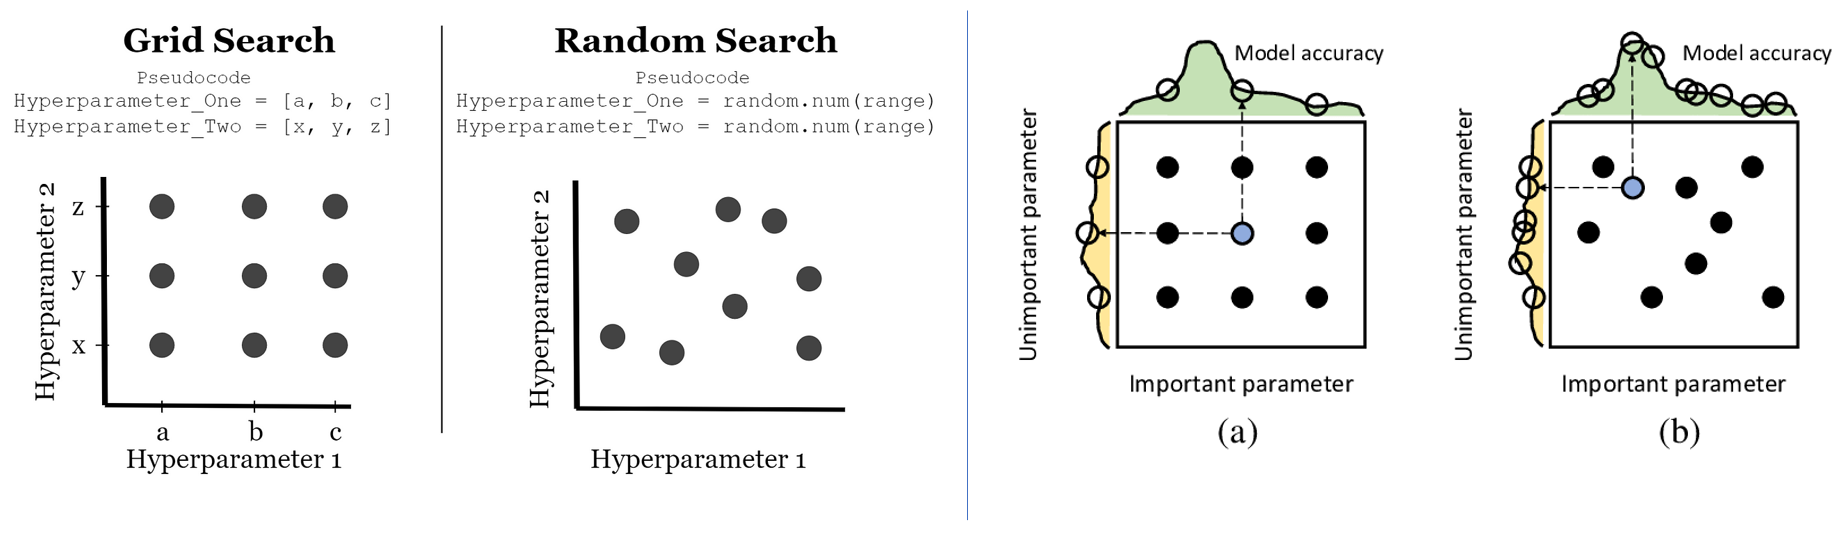

In [ ]:
max_depth = [3,4,5,6]
min_impurity_decrease= [0, 0.01, 0.05, 0.1]
max_leaf_nodes=[3,4,5,6,7]



In [182]:
from sklearn.model_selection import GridSearchCV

table = PrettyTable(field_names=['model', 'best parameters', 'best score'])

param_grid = {'Logistic Regression': {
                        'model': LogisticRegression(max_iter=10_000),
                        'params': {'C': [0.1, 1, 10]}},

                'SVM': {
                    'model': SVC(),
                    'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
                },

                'KNN': {
                    'model': KNeighborsClassifier(),
                    'params': {'n_neighbors':[3, 5, 8]}
                },

                'Decision Tree': {
                    'model': DecisionTreeClassifier(),
                    'params': {'max_depth': [3,4,5,6], 
                               'min_impurity_decrease':[0, 0.01, 0.05, 0.1],
                               'max_leaf_nodes':[3,4,5,6,7]}
                },

                'Random Forest': {
                    'model': RandomForestClassifier(n_jobs=-1),
                    'params': {'max_depth': [3,4,5], 
                               'min_impurity_decrease':[0, 0.01, 0.05],
                               'max_leaf_nodes':[3,4,5],
                               'n_estimators': [50, 100, 500]}
                },


          }


for name, parm in param_grid.items():
    grid_search = GridSearchCV(parm['model'], parm['params'], cv=5, scoring='accuracy')

    grid_search.fit(X,y)

    table.add_row([name, grid_search.best_params_, round(grid_search.best_score_, 3)])


print(table)


+---------------------+-------------------------------------------------------------------------------------------+------------+
|        model        |                                      best parameters                                      | best score |
+---------------------+-------------------------------------------------------------------------------------------+------------+
| Logistic Regression |                                         {'C': 10}                                         |   0.953    |
|         SVM         |                               {'C': 10, 'kernel': 'linear'}                               |   0.953    |
|         KNN         |                                     {'n_neighbors': 5}                                    |   0.928    |
|    Decision Tree    |             {'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0}             |   0.937    |
|    Random Forest    | {'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.01, 'n_e

In [183]:
# help(SVC)

In [184]:
# randomized grid search cross validation

from sklearn.model_selection import RandomizedSearchCV

table = PrettyTable(field_names=['model', 'best parameters', 'best score'])


for name, parm in param_grid.items():
    grid_search = RandomizedSearchCV(parm['model'], parm['params'], cv=5, scoring='accuracy', n_iter=5)

    grid_search.fit(X,y)

    table.add_row([name, grid_search.best_params_, round(grid_search.best_score_, 3)])


print(table)

c:\Users\laxmi\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\laxmi\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


+---------------------+-------------------------------------------------------------------------------------------+------------+
|        model        |                                      best parameters                                      | best score |
+---------------------+-------------------------------------------------------------------------------------------+------------+
| Logistic Regression |                                         {'C': 10}                                         |   0.953    |
|         SVM         |                               {'kernel': 'linear', 'C': 10}                               |   0.953    |
|         KNN         |                                     {'n_neighbors': 5}                                    |   0.928    |
|    Decision Tree    |             {'min_impurity_decrease': 0, 'max_leaf_nodes': 4, 'max_depth': 4}             |   0.935    |
|    Random Forest    | {'n_estimators': 500, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 5,